In [6]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
mglearn.plots

<module 'mglearn.plots' from '/opt/anaconda3/envs/ml-env/lib/python3.10/site-packages/mglearn/plots.py'>

In [8]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [11]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [12]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None]
}

gs = GridSearchCV(rf, param_grid = param_grid, n_jobs = -1, return_train_score = True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [13]:
# Carry out the search 

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [14]:
# Get the best hyperparameter values

gs.best_params_

{'max_depth': 20, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [15]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.610334,0.393771,0.159056,0.020836,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.873167,0.881507,...,0.876431,0.003104,48,0.886811,0.890407,0.881921,0.885957,0.884950,0.886009,0.002750
1,10.547095,0.955682,0.288036,0.045479,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.876618,0.887834,...,0.880228,0.004139,46,0.888537,0.893355,0.890335,0.889408,0.889840,0.890295,0.001640
2,20.504324,1.295864,0.470377,0.094292,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881219,0.884671,...,0.881839,0.002203,44,0.889760,0.891989,0.890119,0.891781,0.890271,0.890784,0.000917
3,39.819991,4.327608,0.841222,0.168918,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.884671,0.884095,...,0.882874,0.001852,41,0.889976,0.889976,0.889400,0.889480,0.891134,0.889993,0.000619
4,4.282529,0.532639,0.162850,0.013752,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.881795,0.879206,...,0.880170,0.003044,47,0.892205,0.892133,0.887027,0.886388,0.886244,0.888799,0.002764
5,19.418892,1.971094,0.259316,0.094388,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.884383,0.881219,...,0.884255,0.002829,38,0.894218,0.894650,0.892780,0.895089,0.894226,0.894193,0.000776
6,36.199383,2.295349,0.416427,0.157923,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.882082,0.884671,...,0.883852,0.002377,39,0.894075,0.896016,0.894506,0.894585,0.894226,0.894682,0.000692
7,83.014369,3.178435,0.867998,0.212204,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883520,0.887259,...,0.884600,0.003894,37,0.895081,0.894650,0.894362,0.893938,0.894585,0.894523,0.000374
8,7.241460,0.902483,0.178729,0.022039,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.878056,0.880069,...,0.882644,0.004536,42,0.890407,0.892996,0.887315,0.890631,0.890415,0.890353,0.001805
9,33.972817,0.847944,0.247138,0.056822,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.870866,0.876330,...,0.880919,0.006480,45,0.888034,0.891773,0.891486,0.896095,0.894585,0.892395,0.002783


Let's look at only the most relevant rows

In [17]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [18]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [19]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()

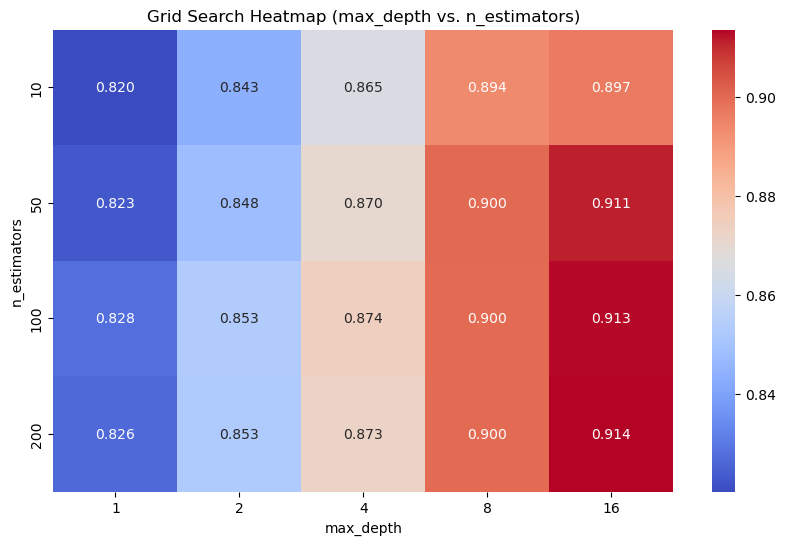

In [21]:
# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1,2,4,8,16],
    "n_estimators": [10,50,100,200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.